### **Data dari OSM**

In [1]:
# import osmnx as ox
# import pandas as pd

# # Definisikan area dan tipe jaringan yang ingin diambil
# area_name = "Jakarta, Indonesia"
# G = ox.graph_from_place(area_name, network_type="drive")  # Ubah ke tipe yang relevan

# # Mengambil data jalan dalam bentuk graf
# nodes, edges = ox.graph_to_gdfs(G)

# # Menghapus kolom yang tidak perlu
# threshold = 0.5 * len(nodes)
# nodes = nodes.dropna(thresh=threshold, axis=1)
# edges = edges.dropna(thresh=threshold, axis=1)

# # Menyimpan data nodes dan edges ke CSV
# nodes.to_csv("jakarta_nodes.csv", index=False)  # Data titik/ simpul
# edges.to_csv("jakarta_edges.csv", index=False)  # Data jalan/ ruas


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
url = 'jakarta_edges.csv'

In [4]:
df = pd.read_csv(url, low_memory=False)

In [5]:
df

,osmid,oneway,lanes,name,highway,width,reversed,length,geometry
0,1263664035,True,3,Jalan Mohammad Husni Thamrin,primary,16.7,False,11.509,"LINESTRING (106.8230517 -6.180894, 106.8230507..."
1,1252511139,False,3,NaN,primary,NaN,False,35.884,"LINESTRING (106.8230517 -6.180894, 106.8230044..."
2,"[1249895912, 1252511139]",False,3,NaN,primary,NaN,True,18.583,"LINESTRING (106.8230517 -6.180894, 106.8230941..."
3,18056345,True,3,Jalan Kebon Sirih,primary,9,False,89.464,"LINESTRING (106.8297992 -6.1828898, 106.830146..."
4,"[18577337, 68558044]",True,1,Jalan Jaksa,residential,3,False,188.012,"LINESTRING (106.8297992 -6.1828898, 106.829680..."
...,...,...,...,...,...,...,...,...,...
224206,169077042,False,2,Jalan RC. Veteran,secondary,NaN,False,12.224,"LINESTRING (106.76797 -6.25833, 106.7679464 -6..."
224207,169077042,False,2,Jalan RC. Veteran,secondary,NaN,True,92.462,"LINESTRING (106.76797 -6.25833, 106.7680085 -6..."
224208,"[41459457, 1035965891, 41459489]",True,3,"['Simpang Susun Cawang', 'Jalan Tol Insinyur W...",motorway,"['7.50', '7.83']",False,645.388,"LINESTRING (106.8770625 -6.2468723, 106.877088..."
224209,"[41459552, 41460141, 41459985, 1242273750, 124...",True,2,Simpang Susun Cawang,motorway,7,False,593.319,"LINESTRING (106.8770625 -6.2468723, 106.876940..."


In [6]:
df.isna().sum()

osmid           0
oneway          0
lanes       53729
name        65096
highway         0
width       59763
reversed        0
length          0
geometry        0
dtype: int64

In [7]:
# Menangani kolom 'lanes'
if 'lanes' in df.columns:
    df['lanes'] = df['lanes'].fillna(df['lanes'].mode()[0])  # Menggunakan modus

# Menangani kolom 'name'
if 'name' in df.columns:
    df['name'] = df['name'].fillna('unknown')  # Mengisi dengan 'unknown'

# Menangani kolom 'width'
if 'width' in df.columns:
    # Mengubah tipe data menjadi numeric, dengan coercing error ke NaN
    df['width'] = pd.to_numeric(df['width'], errors='coerce')
    # Lakukan imputasi menggunakan rata-rata setelah mengubah tipe
    df['width'] = df['width'].fillna(df['width'].mean())  # Menggunakan rata-rata

C:\Users\silvi\AppData\Local\Temp\ipykernel_352\299510964.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_highways.values, y=top_5_highways.index, palette=colors, alpha=0.9)
C:\Users\silvi\AppData\Local\Temp\ipykernel_352\299510964.py:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=top_5_highways.values, y=top_5_highways.index, palette=colors, alpha=0.9)


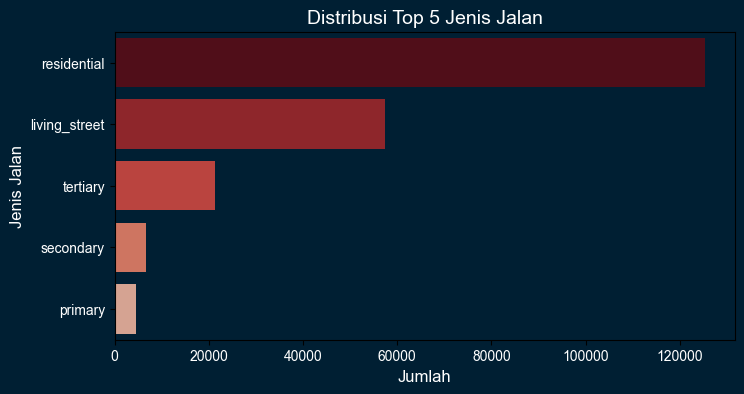

In [8]:
# Mengambil 5 jenis jalan teratas
top_5_highways = df['highway'].value_counts().head(5)

# Membuat figure dengan background biru tua yang hampir hitam
plt.figure(figsize=(8, 4), facecolor='#001F33')  # Menggunakan kode warna biru tua yang sangat gelap

# Menghasilkan gradasi warna merah dari gelap ke terang
colors = plt.cm.Reds(np.linspace(0.3, 1, len(top_5_highways)))  # Mulai dari merah gelap ke merah terang

# Membalik urutan warna sehingga yang paling gelap di atas
colors = colors[::-1]

# Membuat barplot dengan warna gradasi
sns.barplot(x=top_5_highways.values, y=top_5_highways.index, palette=colors, alpha=0.9)

# Mengatur warna latar belakang sumbu
plt.gca().set_facecolor('#001F33')

# Menambahkan judul dan label
plt.title('Distribusi Top 5 Jenis Jalan', fontsize=14, color='white', fontdict={'family': 'Arial'})
plt.xlabel('Jumlah', fontsize=12, color='white', fontdict={'family': 'Arial'})
plt.ylabel('Jenis Jalan', fontsize=12, color='white', fontdict={'family': 'Arial'})

# Mengatur warna tick label
plt.xticks(color='white', fontname='Arial')
plt.yticks(color='white', fontname='Arial')

# Menampilkan plot
plt.show()

### **Data dari Kaggle**

In [9]:
# Load the dataset to examine its structure and contents
file_path = 'ForExport.csv'
data = pd.read_csv(file_path)

# Display basic information and first few rows to understand the dataset structure
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346558 entries, 0 to 346557
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Country                         346558 non-null  object 
 1   City                            346558 non-null  object 
 2   UpdateTimeUTC                   346558 non-null  object 
 3   JamsDelay                       346558 non-null  float64
 4   TrafficIndexLive                346558 non-null  float64
 5   JamsLengthInKms                 346558 non-null  float64
 6   JamsCount                       346558 non-null  float64
 7   TrafficIndexWeekAgo             346558 non-null  float64
 8   UpdateTimeUTCWeekAgo            346558 non-null  object 
 9   TravelTimeLivePer10KmsMins      346558 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  346558 non-null  float64
 11  MinsDelay                       346558 non-null  float64
dtypes: float64(8), o

(None,
   Country       City            UpdateTimeUTC  JamsDelay  TrafficIndexLive  \
 0     ARE  abu-dhabi  2024-11-06 04:01:00.000      531.8              33.0   
 1     ARE  abu-dhabi  2024-11-06 03:46:30.000      516.1              29.0   
 2     ARE  abu-dhabi  2024-11-06 02:46:30.001       61.1               6.0   
 3     ARE  abu-dhabi  2024-11-06 01:46:30.000        5.0               3.0   
 4     ARE  abu-dhabi  2024-11-06 00:01:30.000        4.9               3.0   
 
    JamsLengthInKms  JamsCount  TrafficIndexWeekAgo     UpdateTimeUTCWeekAgo  \
 0             97.7      146.0                 34.0  2024-10-30 04:01:30.000   
 1             98.8      151.0                 29.0  2024-10-30 03:46:30.000   
 2             12.9       21.0                  5.0  2024-10-30 02:46:30.000   
 3              2.3        2.0                  3.0  2024-10-30 01:46:30.000   
 4              3.6        2.0                  3.0  2024-10-30 00:01:30.001   
 
    TravelTimeLivePer10KmsMins  Tra

C:\Users\silvi\AppData\Local\Temp\ipykernel_352\3215511240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jakarta_data['UpdateTimeUTC'] = pd.to_datetime(jakarta_data['UpdateTimeUTC'])


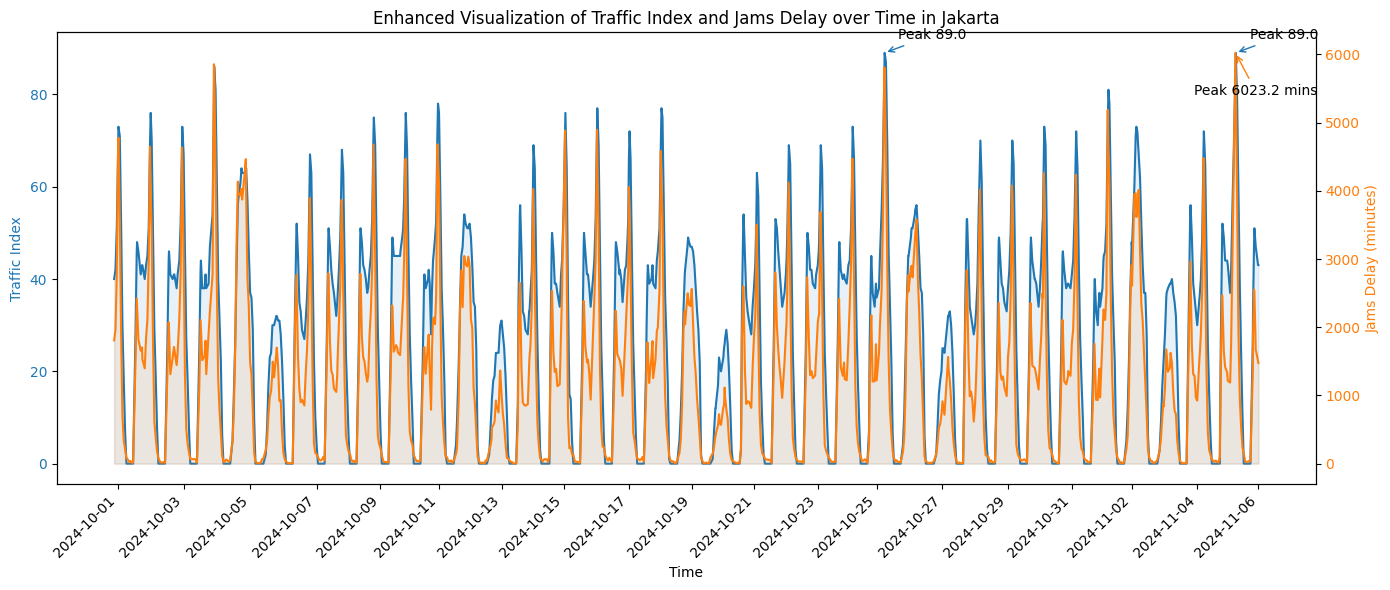

In [10]:
# Load the dataset and filter for Jakarta
data = pd.read_csv(file_path)
jakarta_data = data[data['City'].str.lower() == 'jakarta']

# Convert UpdateTimeUTC to datetime format for easier handling
jakarta_data['UpdateTimeUTC'] = pd.to_datetime(jakarta_data['UpdateTimeUTC'])

# Initialize the figure and axis objects
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Traffic Index Live with the primary y-axis
ax1.plot(jakarta_data['UpdateTimeUTC'], jakarta_data['TrafficIndexLive'], color='tab:blue', label='Traffic Index Live', linewidth=1.5)
ax1.fill_between(jakarta_data['UpdateTimeUTC'], 0, jakarta_data['TrafficIndexLive'], color='tab:blue', alpha=0.1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Traffic Index', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot Jams Delay on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(jakarta_data['UpdateTimeUTC'], jakarta_data['JamsDelay'], color='tab:orange', label='Jams Delay (minutes)', linewidth=1.5)
ax2.fill_between(jakarta_data['UpdateTimeUTC'], 0, jakarta_data['JamsDelay'], color='tab:orange', alpha=0.1)
ax2.set_ylabel('Jams Delay (minutes)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Highlighting peaks
for index, row in jakarta_data.iterrows():
    if row['TrafficIndexLive'] == jakarta_data['TrafficIndexLive'].max():
        ax1.annotate(f'Peak {row["TrafficIndexLive"]:.1f}', xy=(row['UpdateTimeUTC'], row['TrafficIndexLive']), 
                     xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='tab:blue'))
    if row['JamsDelay'] == jakarta_data['JamsDelay'].max():
        ax2.annotate(f'Peak {row["JamsDelay"]:.1f} mins', xy=(row['UpdateTimeUTC'], row['JamsDelay']), 
                     xytext=(-30, -30), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='tab:orange'))

# Add title, legend, and format x-axis with fewer ticks
plt.title('Enhanced Visualization of Traffic Index and Jams Delay over Time in Jakarta')
fig.autofmt_xdate(rotation=45)
plt.xticks(jakarta_data['UpdateTimeUTC'][::50])

# Show plot
fig.tight_layout()
plt.show()

Seberapa Besar Pengaruh Konfigurasi Jalan terhadap Kemacetan di Jakarta?

Pernah bertanya-tanya kenapa Jakarta bisa macet banget di jam-jam tertentu? Grafik ini memberi kita dua petunjuk penting: Traffic Index Live (indeks kemacetan langsung) dan Jams Delay (penundaan karena macet). Ketika indeks kemacetan naik, waktu tempuh juga ikut bertambah—artinya, pengendara harus siap-siap lebih lama di jalan.

Nah, apa kaitannya dengan konfigurasi jalan? Ternyata, jumlah lajur dan tata letak jalan bisa jadi penyelamat atau penyebab kemacetan. Dengan menambah lajur di titik-titik macet atau mengatur jalur secara strategis, waktu perjalanan bisa lebih singkat. Jadi, kalau Jakarta punya desain jalan yang lebih pas, mungkin saja kemacetan bukan lagi momok harian bagi warganya. Siapa tahu, kan?

### **Data dari Scrapping OSM**

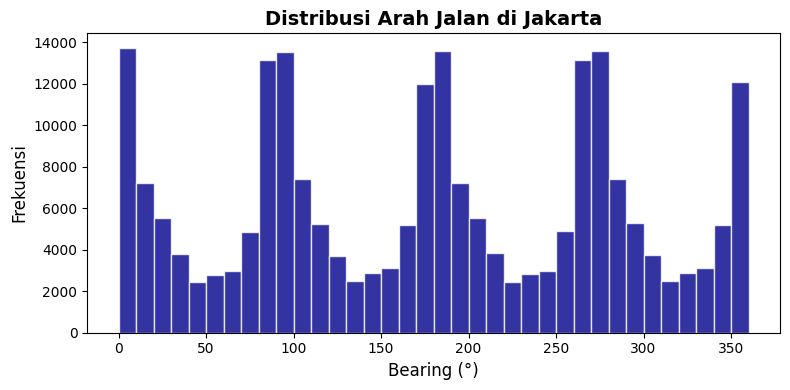

In [11]:
import osmnx as ox

# Fungsi untuk menghitung bearing antara dua titik (lat, lon)
def calculate_bearing(lat1, lon1, lat2, lon2):
    """Menghitung bearing antara dua titik (lat, lon)"""
    # Konversi derajat ke radian
    lat1, lon1, lat2, lon2 = [np.radians(x) for x in [lat1, lon1, lat2, lon2]]
    
    # Rumus untuk menghitung bearing
    dlon = lon2 - lon1
    y = np.sin(dlon) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dlon)
    initial_bearing = np.arctan2(y, x)
    
    # Ubah dari radian ke derajat
    initial_bearing = np.degrees(initial_bearing)
    
    # Normalize untuk memastikan nilai bearing antara 0° dan 360°
    bearing = (initial_bearing + 360) % 360
    
    return bearing

# Ambil street network dari OSM (OpenStreetMap) untuk sebuah kota
city = "Jakarta, Indonesia"
graph = ox.graph_from_place(city, network_type='drive')

# List untuk menyimpan semua bearings
bearings = []

# Iterasi semua edges untuk menghitung bearings
for u, v, data in graph.edges(data=True):
    lat1, lon1 = graph.nodes[u]['y'], graph.nodes[u]['x']
    lat2, lon2 = graph.nodes[v]['y'], graph.nodes[v]['x']
    
    # Hitung bearing dan simpan dalam list
    bearing = calculate_bearing(lat1, lon1, lat2, lon2)
    bearings.append(bearing)

# Visualisasi histogram bearings dengan gaya yang diperbarui
plt.figure(figsize=(8, 4))
plt.hist(bearings, bins=36, edgecolor='white', color='darkblue', alpha=0.8)
plt.title("Distribusi Arah Jalan di Jakarta", fontsize=14, fontweight='bold')
plt.xlabel("Bearing (°)", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)

# Hilangkan garis grid
plt.grid(visible=False)

# Sesuaikan jarak sumbu untuk tampilan lebih rapi
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

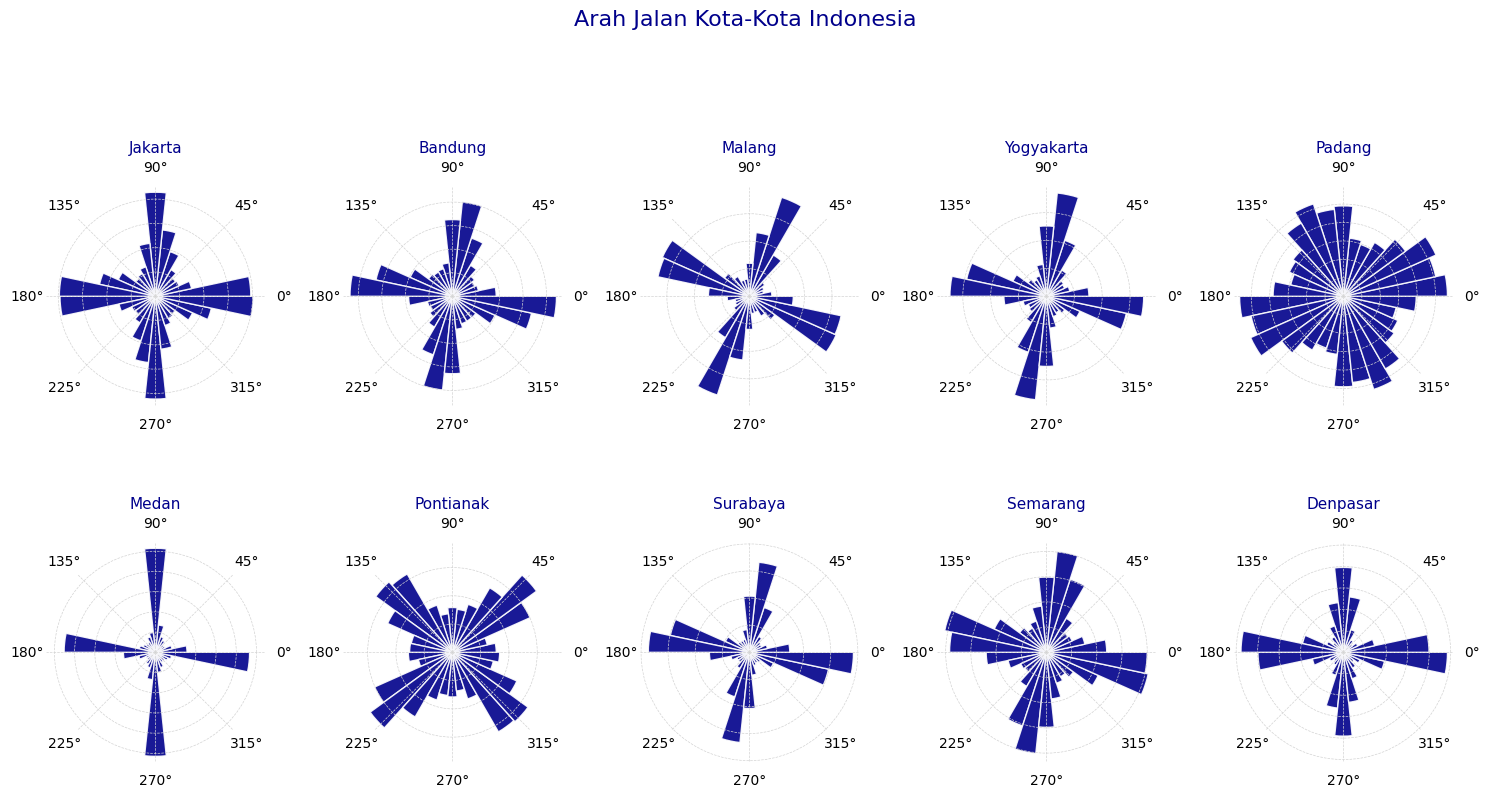

In [12]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Daftar kota yang ingin dianalisis, sesuai urutan yang diminta
cities = [
    "Jakarta, Indonesia", 
    "Bandung, Indonesia", 
    "Malang, Indonesia", 
    "Yogyakarta, Indonesia", 
    "Padang, Indonesia", 
    "Medan, Indonesia", 
    "Pontianak, Indonesia", 
    "Surabaya, Indonesia", 
    "Semarang, Indonesia", 
    "Denpasar, Indonesia"
]

n_cities = len(cities)

# Atur jumlah baris dan kolom untuk subplot
rows = 2  # Sesuaikan jumlah baris (karena ada 10 kota)
cols = 5  # Sesuaikan jumlah kolom
fig, axes = plt.subplots(rows, cols, subplot_kw=dict(projection='polar'), figsize=(15, 8))
fig.suptitle("Arah Jalan Kota-Kota Indonesia", fontsize=16, color='#00008b', y=1.03)  # Warna biru tua untuk judul, lebih dekat

# Fungsi untuk menghitung orientasi jalan
def calculate_orientations(G):
    orientations = []
    for u, v, data in G.edges(data=True):
        if 'geometry' in data:
            line = data['geometry']
            angle = np.arctan2(line.xy[1][-1] - line.xy[1][0], line.xy[0][-1] - line.xy[0][0])
            orientations.append(angle)
    return orientations

# Loop untuk setiap kota
for i, city in enumerate(cities):
    row, col = divmod(i, cols)  # Tentukan posisi subplot
    ax = axes[row, col]

    # Unduh data jaringan jalan
    G = ox.graph_from_place(city, network_type="drive")

    # Hitung orientasi jalan
    orientations = calculate_orientations(G)
    orientations = np.array(orientations)

    # Plot histogram orientasi jalan dalam bentuk polar
    ax.hist(orientations, bins=30, color="#00008b", alpha=0.9, edgecolor="white")  # Warna biru tua dengan tepi putih
    ax.set_yticklabels([])  # Hapus label di sumbu radial
    ax.set_title(city.split(",")[0], fontsize=11, color='#00008b')  # Warna biru tua untuk nama kota
    ax.spines['polar'].set_visible(False)  # Hilangkan garis bingkai polar
    ax.grid(color='lightgray', linestyle='--', linewidth=0.5)  # Grid garis putus-putus berwarna abu muda

# Hapus subplot kosong jika ada
for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])

# Atur padding agar lebih rapi
plt.subplots_adjust(wspace=0.1, hspace=0.2)  # Atur jarak antar subplot lebih dekat
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Sesuaikan area tampilan

plt.show()

Pernahkah terpikir bahwa pola arah jalan di kota-kota Indonesia berperan dalam menentukan kemacetan? Visualisasi ini memperlihatkan bahwa kota dengan pola grid, seperti Jakarta dan Surabaya, memungkinkan arus lalu lintas yang lebih lancar karena banyaknya jalur alternatif. Sebaliknya, kota seperti Padang dan Pontianak, dengan pola jalan yang lebih acak, justru sering mengalami bottleneck di persimpangan utama.

Mengapa pola jalan yang terstruktur penting? Dengan jalur yang konsisten, pengendara dapat memilih rute yang lebih efisien, mengurangi waktu tunggu, dan menghindari kemacetan. Sementara di kota dengan pola jalan yang tidak beraturan, kemacetan mudah terjadi karena keterbatasan rute alternatif.

Bisakah kemacetan ini dikurangi dengan menata ulang pola jalan? Jawabannya, ya. Memahami pola-pola ini membantu perencana kota menambah rute atau mengoptimalkan konektivitas untuk arus yang lebih lancar. Artikel ini akan menjelaskan lebih jauh tentang bagaimana konfigurasi jalan menjadi kunci untuk memperbaiki arus lalu lintas di kota Anda.



### **Jakarta**

C:\Users\silvi\AppData\Local\Temp\ipykernel_352\1868664721.py:19: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)
C:\Users\silvi\AppData\Local\Temp\ipykernel_352\1868664721.py:19: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)


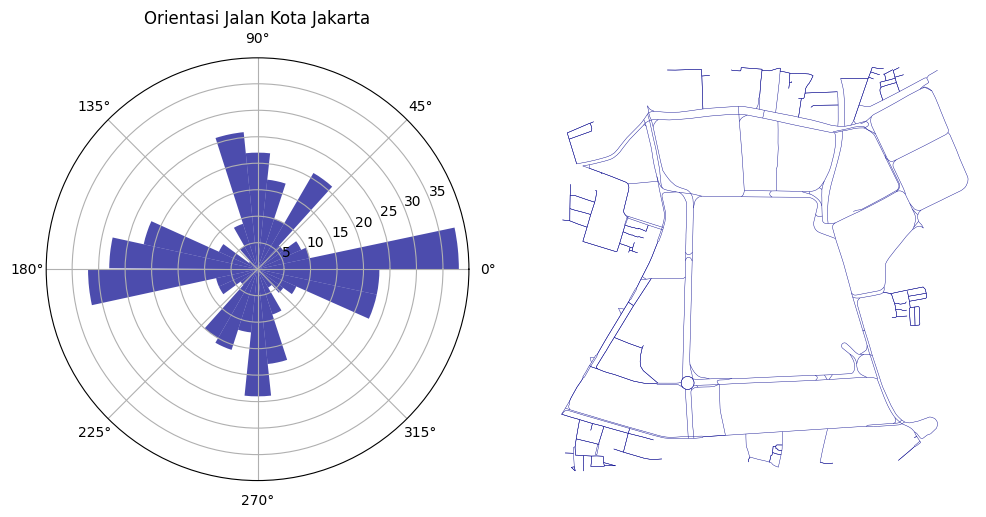

<Figure size 640x480 with 0 Axes>

In [13]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# Koordinat pusat kota Jakarta
latitude = -6.175
longitude = 106.8266

# Tentukan jarak buffer dalam derajat (misalnya, sekitar 0.01 derajat untuk area kecil)
buffer = 0.01

# Tentukan bounding box berdasarkan koordinat pusat dan buffer
north = latitude + buffer
south = latitude - buffer
east = longitude + buffer
west = longitude - buffer

# Unduh data jaringan jalan dari area pusat kota Jakarta dengan bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)

# Fungsi untuk menghitung orientasi jalan
def calculate_orientations(G):
    orientations = []
    for u, v, data in G.edges(data=True):
        if 'geometry' in data:
            line = data['geometry']
            angle = np.arctan2(line.xy[1][-1] - line.xy[1][0], line.xy[0][-1] - line.xy[0][0])
            orientations.append(angle)
    return orientations

# Hitung orientasi jalan
orientations = calculate_orientations(G)
orientations = np.array(orientations)

# Buat plot polar orientasi jalan dan jaringan jalan
fig = plt.figure(figsize=(12, 6))

# Plot polar orientasi jalan
ax1 = fig.add_subplot(1, 2, 1, projection="polar")
ax1.hist(orientations, bins=30, color="darkblue", alpha=0.7)  # Ubah warna menjadi biru tua
ax1.set_title("Orientasi Jalan Kota Jakarta", fontsize=12)

# Plot jaringan jalan dengan pengaturan ketebalan garis yang lebih kecil
ax2 = fig.add_subplot(1, 2, 2)
ox.plot_graph(
    G, 
    ax=ax2, 
    node_size=0, 
    edge_color="darkblue",  # Ubah warna menjadi biru tua
    edge_linewidth=0.3,  # Mengurangi ketebalan garis agar lebih tipis
    bgcolor="white"
)
ax2.set_title("Jaringan Jalan Pusat Kota Jakarta", fontsize=12)

plt.tight_layout()
plt.show()

### **Bandung**

C:\Users\silvi\AppData\Local\Temp\ipykernel_352\1549054528.py:19: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)
C:\Users\silvi\AppData\Local\Temp\ipykernel_352\1549054528.py:19: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)


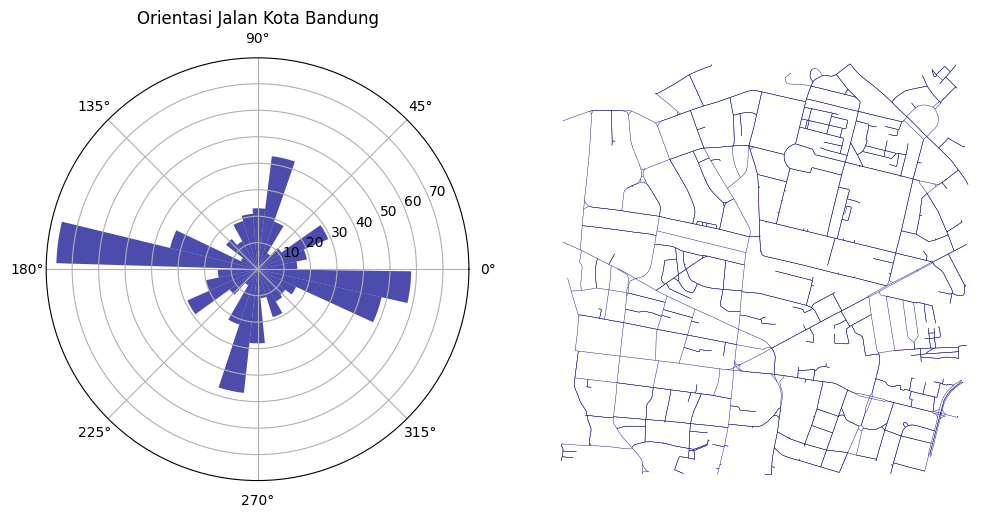

<Figure size 640x480 with 0 Axes>

In [14]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# Koordinat pusat kota Bandung
latitude = -6.9175
longitude = 107.6191

# Tentukan jarak buffer dalam derajat (misalnya, sekitar 0.01 derajat untuk area kecil)
buffer = 0.01

# Tentukan bounding box berdasarkan koordinat pusat dan buffer
north = latitude + buffer
south = latitude - buffer
east = longitude + buffer
west = longitude - buffer

# Unduh data jaringan jalan dari area pusat kota Bandung dengan bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)

# Fungsi untuk menghitung orientasi jalan
def calculate_orientations(G):
    orientations = []
    for u, v, data in G.edges(data=True):
        if 'geometry' in data:
            line = data['geometry']
            angle = np.arctan2(line.xy[1][-1] - line.xy[1][0], line.xy[0][-1] - line.xy[0][0])
            orientations.append(angle)
    return orientations

# Hitung orientasi jalan
orientations = calculate_orientations(G)
orientations = np.array(orientations)

# Buat plot polar orientasi jalan dan jaringan jalan
fig = plt.figure(figsize=(12, 6))

# Plot polar orientasi jalan
ax1 = fig.add_subplot(1, 2, 1, projection="polar")
ax1.hist(orientations, bins=30, color="darkblue", alpha=0.7)  # Ubah warna menjadi biru tua
ax1.set_title("Orientasi Jalan Kota Bandung", fontsize=12)

# Plot jaringan jalan dengan pengaturan ketebalan garis yang lebih kecil
ax2 = fig.add_subplot(1, 2, 2)
ox.plot_graph(
    G, 
    ax=ax2, 
    node_size=0, 
    edge_color="darkblue",  # Ubah warna menjadi biru tua
    edge_linewidth=0.3,  # Mengurangi ketebalan garis agar lebih tipis
    bgcolor="white"
)
ax2.set_title("Jaringan Jalan Pusat Kota Bandung", fontsize=12)

plt.tight_layout()
plt.show()

### **Malang**

C:\Users\silvi\AppData\Local\Temp\ipykernel_352\1588293533.py:19: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)
C:\Users\silvi\AppData\Local\Temp\ipykernel_352\1588293533.py:19: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)


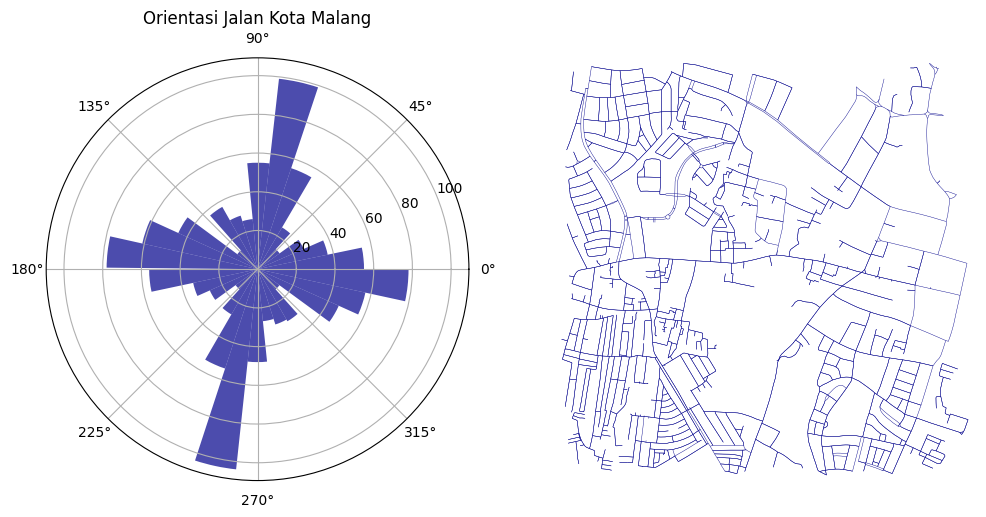

<Figure size 640x480 with 0 Axes>

In [15]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# Koordinat pusat kota Malang
latitude = -7.983908
longitude = 112.621391

# Tentukan jarak buffer dalam derajat (misalnya, sekitar 0.01 derajat untuk area kecil)
buffer = 0.01

# Tentukan bounding box berdasarkan koordinat pusat dan buffer
north = latitude + buffer
south = latitude - buffer
east = longitude + buffer
west = longitude - buffer

# Unduh data jaringan jalan dari area pusat kota Malang dengan bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)

# Fungsi untuk menghitung orientasi jalan
def calculate_orientations(G):
    orientations = []
    for u, v, data in G.edges(data=True):
        if 'geometry' in data:
            line = data['geometry']
            angle = np.arctan2(line.xy[1][-1] - line.xy[1][0], line.xy[0][-1] - line.xy[0][0])
            orientations.append(angle)
    return orientations

# Hitung orientasi jalan
orientations = calculate_orientations(G)
orientations = np.array(orientations)

# Buat plot polar orientasi jalan dan jaringan jalan
fig = plt.figure(figsize=(12, 6))

# Plot polar orientasi jalan
ax1 = fig.add_subplot(1, 2, 1, projection="polar")
ax1.hist(orientations, bins=30, color="darkblue", alpha=0.7)  # Ubah warna menjadi biru tua
ax1.set_title("Orientasi Jalan Kota Malang", fontsize=12)

# Plot jaringan jalan dengan pengaturan ketebalan garis yang lebih kecil
ax2 = fig.add_subplot(1, 2, 2)
ox.plot_graph(
    G, 
    ax=ax2, 
    node_size=0, 
    edge_color="darkblue",  # Ubah warna menjadi biru tua
    edge_linewidth=0.3,  # Mengurangi ketebalan garis agar lebih tipis
    bgcolor="white"
)
ax2.set_title("Jaringan Jalan Pusat Kota Malang", fontsize=12)

plt.tight_layout()
plt.show()

### **Yogya**

C:\Users\silvi\AppData\Local\Temp\ipykernel_352\3026103871.py:19: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)
C:\Users\silvi\AppData\Local\Temp\ipykernel_352\3026103871.py:19: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)


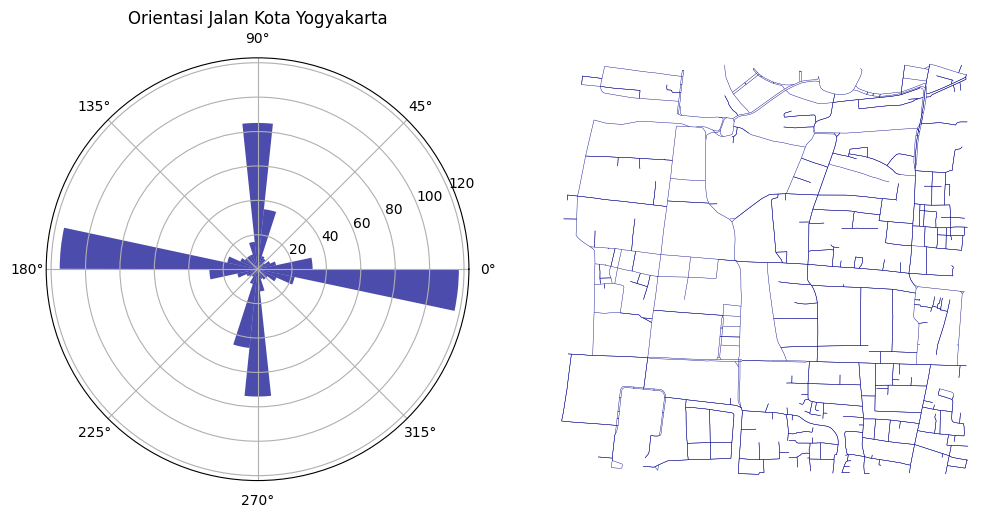

<Figure size 640x480 with 0 Axes>

In [16]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# Koordinat pusat kota Yogyakarta
latitude = -7.797068
longitude = 110.370529

# Tentukan jarak buffer dalam derajat (misalnya, sekitar 0.01 derajat untuk area kecil)
buffer = 0.01

# Tentukan bounding box berdasarkan koordinat pusat dan buffer
north = latitude + buffer
south = latitude - buffer
east = longitude + buffer
west = longitude - buffer

# Unduh data jaringan jalan dari area pusat kota Yogyakarta dengan bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)

# Fungsi untuk menghitung orientasi jalan
def calculate_orientations(G):
    orientations = []
    for u, v, data in G.edges(data=True):
        if 'geometry' in data:
            line = data['geometry']
            angle = np.arctan2(line.xy[1][-1] - line.xy[1][0], line.xy[0][-1] - line.xy[0][0])
            orientations.append(angle)
    return orientations

# Hitung orientasi jalan
orientations = calculate_orientations(G)
orientations = np.array(orientations)

# Buat plot polar orientasi jalan dan jaringan jalan
fig = plt.figure(figsize=(12, 6))

# Plot polar orientasi jalan
ax1 = fig.add_subplot(1, 2, 1, projection="polar")
ax1.hist(orientations, bins=30, color="darkblue", alpha=0.7)  # Ubah warna menjadi biru tua
ax1.set_title("Orientasi Jalan Kota Yogyakarta", fontsize=12)

# Plot jaringan jalan dengan pengaturan ketebalan garis yang lebih kecil
ax2 = fig.add_subplot(1, 2, 2)
ox.plot_graph(
    G, 
    ax=ax2, 
    node_size=0, 
    edge_color="darkblue",  # Ubah warna menjadi biru tua
    edge_linewidth=0.3,  # Mengurangi ketebalan garis agar lebih tipis
    bgcolor="white"
)
ax2.set_title("Jaringan Jalan Pusat Kota Yogyakarta", fontsize=12)

plt.tight_layout()
plt.show()

### **Padang**

C:\Users\silvi\AppData\Local\Temp\ipykernel_352\1367525470.py:19: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)
C:\Users\silvi\AppData\Local\Temp\ipykernel_352\1367525470.py:19: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)


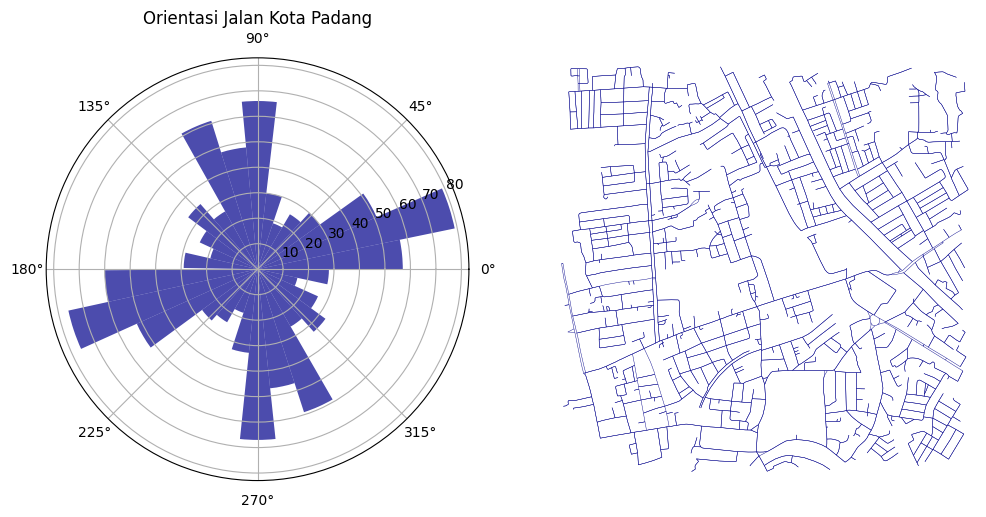

<Figure size 640x480 with 0 Axes>

In [17]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# Koordinat pusat kota Padang
latitude = -0.942942
longitude = 100.371857

# Tentukan jarak buffer dalam derajat (misalnya, sekitar 0.01 derajat untuk area kecil)
buffer = 0.01

# Tentukan bounding box berdasarkan koordinat pusat dan buffer
north = latitude + buffer
south = latitude - buffer
east = longitude + buffer
west = longitude - buffer

# Unduh data jaringan jalan dari area pusat kota Padang dengan bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)

# Fungsi untuk menghitung orientasi jalan
def calculate_orientations(G):
    orientations = []
    for u, v, data in G.edges(data=True):
        if 'geometry' in data:
            line = data['geometry']
            angle = np.arctan2(line.xy[1][-1] - line.xy[1][0], line.xy[0][-1] - line.xy[0][0])
            orientations.append(angle)
    return orientations

# Hitung orientasi jalan
orientations = calculate_orientations(G)
orientations = np.array(orientations)

# Buat plot polar orientasi jalan dan jaringan jalan
fig = plt.figure(figsize=(12, 6))

# Plot polar orientasi jalan
ax1 = fig.add_subplot(1, 2, 1, projection="polar")
ax1.hist(orientations, bins=30, color="darkblue", alpha=0.7)  # Ubah warna menjadi biru tua
ax1.set_title("Orientasi Jalan Kota Padang", fontsize=12)

# Plot jaringan jalan dengan pengaturan ketebalan garis yang lebih kecil
ax2 = fig.add_subplot(1, 2, 2)
ox.plot_graph(
    G, 
    ax=ax2, 
    node_size=0, 
    edge_color="darkblue",  # Ubah warna menjadi biru tua
    edge_linewidth=0.3,  # Mengurangi ketebalan garis agar lebih tipis
    bgcolor="white"
)
ax2.set_title("Jaringan Jalan Pusat Kota Padang", fontsize=12)

plt.tight_layout()
plt.show()

### **Medan**

C:\Users\silvi\AppData\Local\Temp\ipykernel_352\2579135372.py:19: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)
C:\Users\silvi\AppData\Local\Temp\ipykernel_352\2579135372.py:19: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)


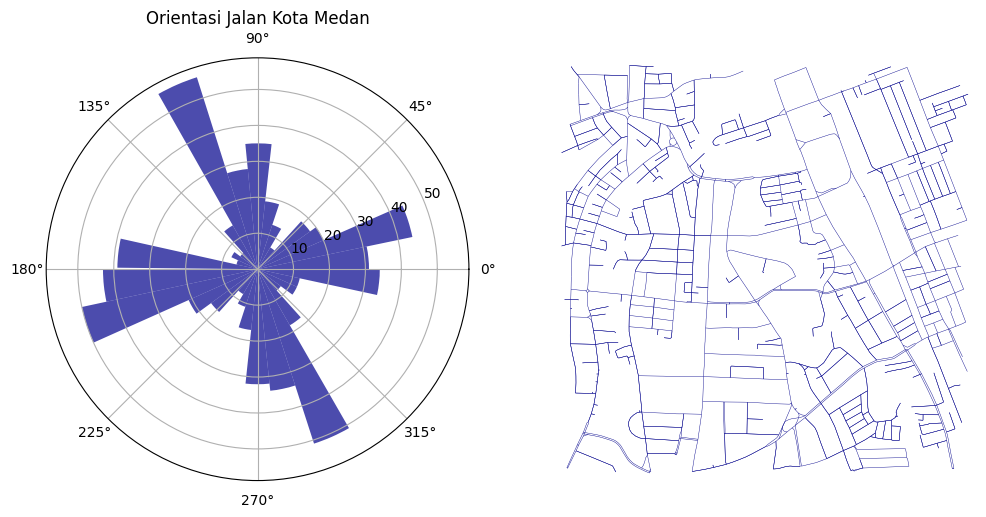

<Figure size 640x480 with 0 Axes>

In [18]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# Koordinat pusat kota Medan
latitude = 3.58524200
longitude = 98.67559790

# Tentukan jarak buffer dalam derajat (misalnya, sekitar 0.01 derajat untuk area kecil)
buffer = 0.01

# Tentukan bounding box berdasarkan koordinat pusat dan buffer
north = latitude + buffer
south = latitude - buffer
east = longitude + buffer
west = longitude - buffer

# Unduh data jaringan jalan dari area pusat kota Medan dengan bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)

# Fungsi untuk menghitung orientasi jalan
def calculate_orientations(G):
    orientations = []
    for u, v, data in G.edges(data=True):
        if 'geometry' in data:
            line = data['geometry']
            angle = np.arctan2(line.xy[1][-1] - line.xy[1][0], line.xy[0][-1] - line.xy[0][0])
            orientations.append(angle)
    return orientations

# Hitung orientasi jalan
orientations = calculate_orientations(G)
orientations = np.array(orientations)

# Buat plot polar orientasi jalan dan jaringan jalan
fig = plt.figure(figsize=(12, 6))

# Plot polar orientasi jalan
ax1 = fig.add_subplot(1, 2, 1, projection="polar")
ax1.hist(orientations, bins=30, color="darkblue", alpha=0.7)  # Ubah warna menjadi biru tua
ax1.set_title("Orientasi Jalan Kota Medan", fontsize=12)

# Plot jaringan jalan dengan pengaturan ketebalan garis yang lebih kecil
ax2 = fig.add_subplot(1, 2, 2)
ox.plot_graph(
    G, 
    ax=ax2, 
    node_size=0, 
    edge_color="darkblue",  # Ubah warna menjadi biru tua
    edge_linewidth=0.3,  # Mengurangi ketebalan garis agar lebih tipis
    bgcolor="white"
)
ax2.set_title("Jaringan Jalan Pusat Kota Medan", fontsize=12)

plt.tight_layout()
plt.show()

### **Pontianak**

C:\Users\silvi\AppData\Local\Temp\ipykernel_352\885758116.py:19: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)
C:\Users\silvi\AppData\Local\Temp\ipykernel_352\885758116.py:19: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)


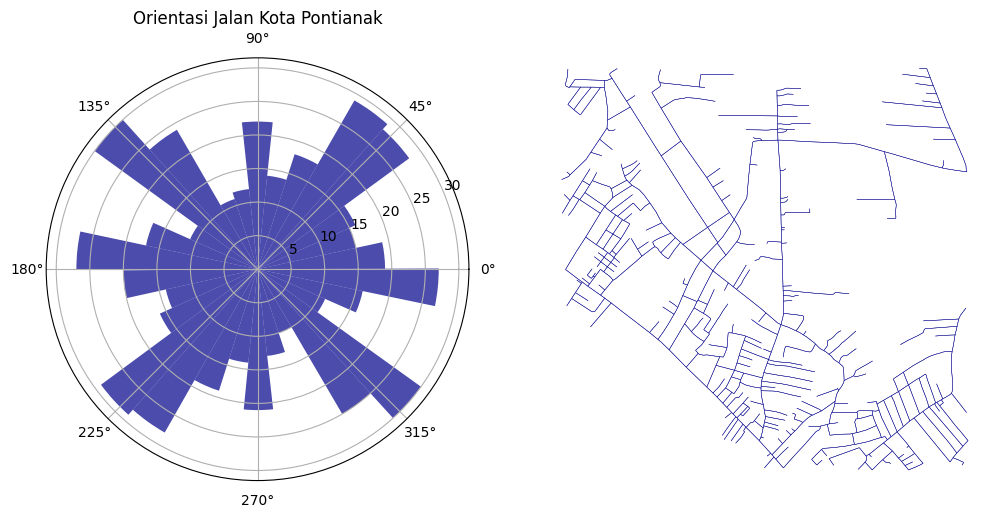

<Figure size 640x480 with 0 Axes>

In [19]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# Koordinat pusat kota Pontianak
latitude = 0.000000
longitude = 109.333336

# Tentukan jarak buffer dalam derajat (misalnya, sekitar 0.01 derajat untuk area kecil)
buffer = 0.01

# Tentukan bounding box berdasarkan koordinat pusat dan buffer
north = latitude + buffer
south = latitude - buffer
east = longitude + buffer
west = longitude - buffer

# Unduh data jaringan jalan dari area pusat kota Pontianak dengan bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)

# Fungsi untuk menghitung orientasi jalan
def calculate_orientations(G):
    orientations = []
    for u, v, data in G.edges(data=True):
        if 'geometry' in data:
            line = data['geometry']
            angle = np.arctan2(line.xy[1][-1] - line.xy[1][0], line.xy[0][-1] - line.xy[0][0])
            orientations.append(angle)
    return orientations

# Hitung orientasi jalan
orientations = calculate_orientations(G)
orientations = np.array(orientations)

# Buat plot polar orientasi jalan dan jaringan jalan
fig = plt.figure(figsize=(12, 6))

# Plot polar orientasi jalan dengan warna biru tua
ax1 = fig.add_subplot(1, 2, 1, projection="polar")
ax1.hist(orientations, bins=30, color="darkblue", alpha=0.7)
ax1.set_title("Orientasi Jalan Kota Pontianak", fontsize=12)

# Plot jaringan jalan dengan warna biru tua dan garis yang lebih tipis
ax2 = fig.add_subplot(1, 2, 2)
ox.plot_graph(
    G, 
    ax=ax2, 
    node_size=0, 
    edge_color="darkblue", 
    edge_linewidth=0.3,  # Mengurangi ketebalan garis agar lebih tipis
    bgcolor="white"
)
ax2.set_title("Jaringan Jalan Pusat Kota Pontianak", fontsize=12)

plt.tight_layout()
plt.show()

### **Surabaya**

C:\Users\silvi\AppData\Local\Temp\ipykernel_352\4154684695.py:19: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)
C:\Users\silvi\AppData\Local\Temp\ipykernel_352\4154684695.py:19: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)


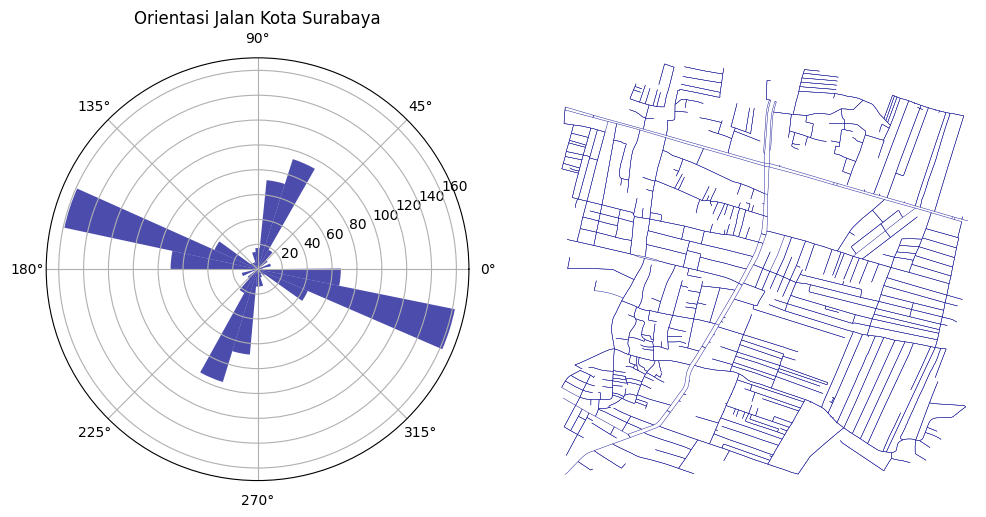

<Figure size 640x480 with 0 Axes>

In [20]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# Koordinat pusat kota Surabaya
latitude = -7.250445
longitude = 112.768845

# Tentukan jarak buffer dalam derajat (misalnya, sekitar 0.01 derajat untuk area kecil)
buffer = 0.01

# Tentukan bounding box berdasarkan koordinat pusat dan buffer
north = latitude + buffer
south = latitude - buffer
east = longitude + buffer
west = longitude - buffer

# Unduh data jaringan jalan dari area pusat kota Surabaya dengan bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)

# Fungsi untuk menghitung orientasi jalan
def calculate_orientations(G):
    orientations = []
    for u, v, data in G.edges(data=True):
        if 'geometry' in data:
            line = data['geometry']
            angle = np.arctan2(line.xy[1][-1] - line.xy[1][0], line.xy[0][-1] - line.xy[0][0])
            orientations.append(angle)
    return orientations

# Hitung orientasi jalan
orientations = calculate_orientations(G)
orientations = np.array(orientations)

# Buat plot polar orientasi jalan dan jaringan jalan
fig = plt.figure(figsize=(12, 6))

# Plot polar orientasi jalan dengan warna biru tua
ax1 = fig.add_subplot(1, 2, 1, projection="polar")
ax1.hist(orientations, bins=30, color="darkblue", alpha=0.7)
ax1.set_title("Orientasi Jalan Kota Surabaya", fontsize=12)

# Plot jaringan jalan dengan warna biru tua dan garis yang lebih tipis
ax2 = fig.add_subplot(1, 2, 2)
ox.plot_graph(
    G, 
    ax=ax2, 
    node_size=0, 
    edge_color="darkblue", 
    edge_linewidth=0.3,  # Mengurangi ketebalan garis agar lebih tipis
    bgcolor="white"
)
ax2.set_title("Jaringan Jalan Pusat Kota Surabaya", fontsize=12)

plt.tight_layout()
plt.show()

### **Semarang**

C:\Users\silvi\AppData\Local\Temp\ipykernel_352\1690948167.py:19: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)
C:\Users\silvi\AppData\Local\Temp\ipykernel_352\1690948167.py:19: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)


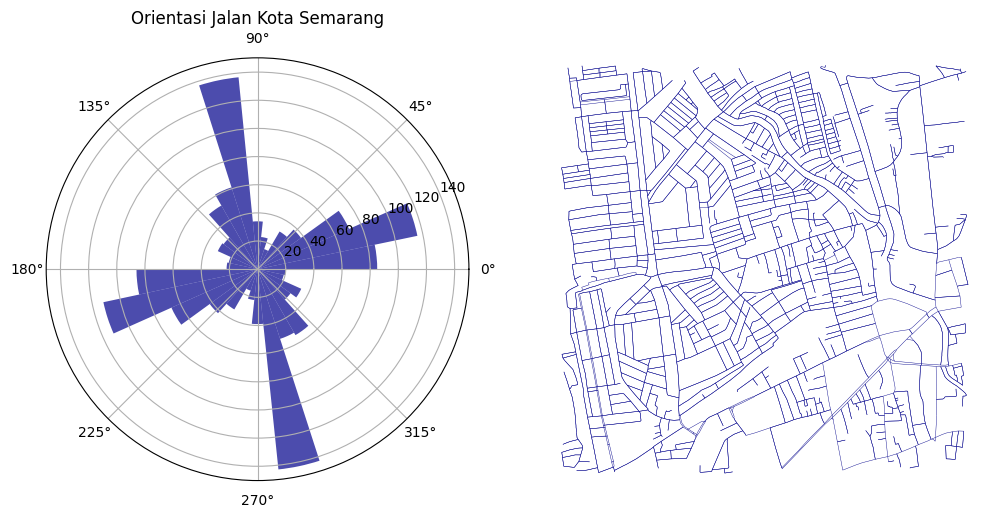

<Figure size 640x480 with 0 Axes>

In [21]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# Koordinat pusat kota Semarang
latitude = -6.966667
longitude = 110.416664

# Tentukan jarak buffer dalam derajat (misalnya, sekitar 0.01 derajat untuk area kecil)
buffer = 0.01

# Tentukan bounding box berdasarkan koordinat pusat dan buffer
north = latitude + buffer
south = latitude - buffer
east = longitude + buffer
west = longitude - buffer

# Unduh data jaringan jalan dari area pusat kota Semarang dengan bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)

# Fungsi untuk menghitung orientasi jalan
def calculate_orientations(G):
    orientations = []
    for u, v, data in G.edges(data=True):
        if 'geometry' in data:
            line = data['geometry']
            angle = np.arctan2(line.xy[1][-1] - line.xy[1][0], line.xy[0][-1] - line.xy[0][0])
            orientations.append(angle)
    return orientations

# Hitung orientasi jalan
orientations = calculate_orientations(G)
orientations = np.array(orientations)

# Buat plot polar orientasi jalan dan jaringan jalan
fig = plt.figure(figsize=(12, 6))

# Plot polar orientasi jalan dengan warna biru tua
ax1 = fig.add_subplot(1, 2, 1, projection="polar")
ax1.hist(orientations, bins=30, color="darkblue", alpha=0.7)
ax1.set_title("Orientasi Jalan Kota Semarang", fontsize=12)

# Plot jaringan jalan dengan warna biru tua dan garis yang lebih tipis
ax2 = fig.add_subplot(1, 2, 2)
ox.plot_graph(
    G, 
    ax=ax2, 
    node_size=0, 
    edge_color="darkblue", 
    edge_linewidth=0.3,  # Mengurangi ketebalan garis agar lebih tipis
    bgcolor="white"
)
ax2.set_title("Jaringan Jalan Pusat Kota Semarang", fontsize=12)

plt.tight_layout()
plt.show()

### **Denpasar**

C:\Users\silvi\AppData\Local\Temp\ipykernel_352\1359104597.py:19: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)
C:\Users\silvi\AppData\Local\Temp\ipykernel_352\1359104597.py:19: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)


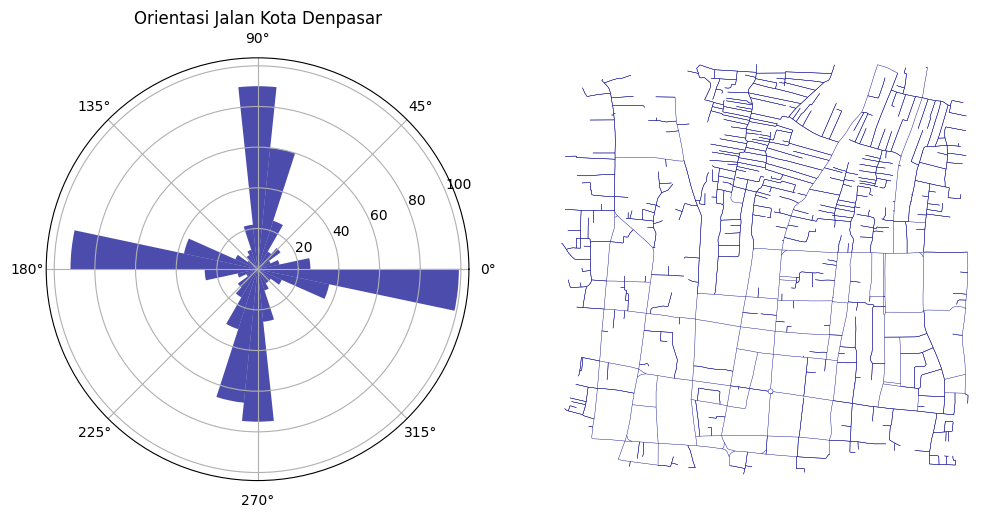

<Figure size 640x480 with 0 Axes>

In [22]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# Koordinat pusat kota Denpasar
latitude = -8.650000
longitude = 115.216667

# Tentukan jarak buffer dalam derajat (misalnya, sekitar 0.01 derajat untuk area kecil)
buffer = 0.01

# Tentukan bounding box berdasarkan koordinat pusat dan buffer
north = latitude + buffer
south = latitude - buffer
east = longitude + buffer
west = longitude - buffer

# Unduh data jaringan jalan dari area pusat kota Denpasar dengan bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive", retain_all=False, simplify=True)

# Fungsi untuk menghitung orientasi jalan
def calculate_orientations(G):
    orientations = []
    for u, v, data in G.edges(data=True):
        if 'geometry' in data:
            line = data['geometry']
            angle = np.arctan2(line.xy[1][-1] - line.xy[1][0], line.xy[0][-1] - line.xy[0][0])
            orientations.append(angle)
    return orientations

# Hitung orientasi jalan
orientations = calculate_orientations(G)
orientations = np.array(orientations)

# Buat plot polar orientasi jalan dan jaringan jalan
fig = plt.figure(figsize=(12, 6))

# Plot polar orientasi jalan dengan warna biru tua
ax1 = fig.add_subplot(1, 2, 1, projection="polar")
ax1.hist(orientations, bins=30, color="darkblue", alpha=0.7)
ax1.set_title("Orientasi Jalan Kota Denpasar", fontsize=12)

# Plot jaringan jalan dengan warna biru tua dan garis yang lebih tipis
ax2 = fig.add_subplot(1, 2, 2)
ox.plot_graph(
    G, 
    ax=ax2, 
    node_size=0, 
    edge_color="darkblue", 
    edge_linewidth=0.3,  # Mengurangi ketebalan garis agar lebih tipis
    bgcolor="white"
)
ax2.set_title("Jaringan Jalan Pusat Kota Denpasar", fontsize=12)

plt.tight_layout()
plt.show()

### **Cluster Arah Jalan**

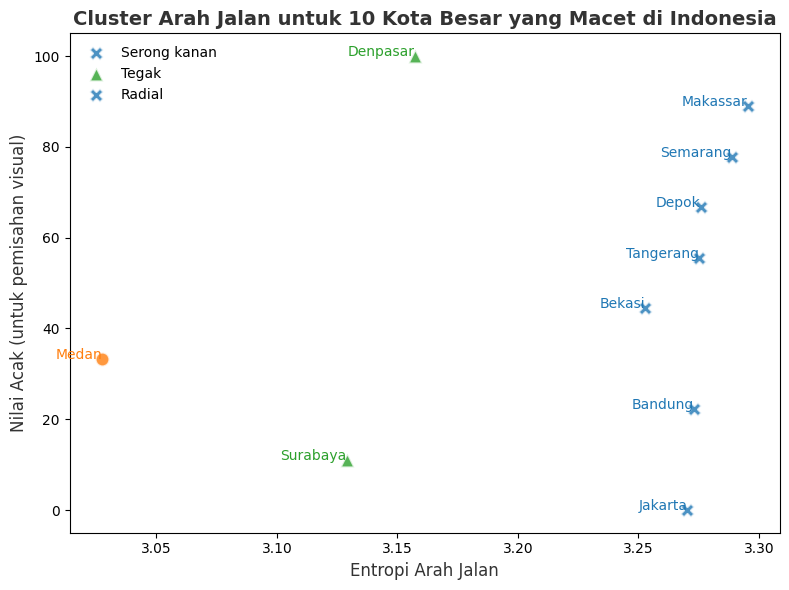

In [23]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import entropy

# Daftar 10 kota besar dengan tingkat kemacetan tinggi di Indonesia
cities = [
    "Jakarta, Indonesia", "Surabaya, Indonesia", "Bandung, Indonesia", "Medan, Indonesia",
    "Bekasi, Indonesia", "Tangerang, Indonesia", "Depok, Indonesia", "Semarang, Indonesia",
    "Makassar, Indonesia", "Denpasar, Indonesia"
]

# Buffer radius in degrees for each city's network area
buffer = 0.01
city_data = []

# Fungsi untuk menghitung orientasi jalan dan entropi
def calculate_orientations_and_entropy(G):
    orientations = []
    for u, v, data in G.edges(data=True):
        if 'geometry' in data:
            line = data['geometry']
            angle = np.arctan2(line.xy[1][-1] - line.xy[1][0], line.xy[0][-1] - line.xy[0][0])
            orientations.append(angle)
    orientation_counts, _ = np.histogram(orientations, bins=30)
    ent = entropy(orientation_counts + 1e-6)  # Tambahkan 1e-6 untuk menghindari log(0)
    return orientations, ent

# Hitung orientasi dan entropi untuk setiap kota
for city in cities:
    # Unduh jaringan jalan
    G = ox.graph_from_place(city, network_type="drive", simplify=True)
    orientations, ent = calculate_orientations_and_entropy(G)
    city_data.append((city.split(",")[0], orientations, ent))

# Ekstraksi entropi dan kota untuk clustering
entropies = [data[2] for data in city_data]

# KMeans clustering untuk 3 kategori arah jalan
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(np.array(entropies).reshape(-1, 1))

# Visualisasi hasil cluster
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Warna senada: biru, oranye, hijau
markers = ['X', 'o', '^']
y_positions = np.linspace(0, 100, len(city_data))  # Buat posisi y tetap terpisah secara visual

for i, (city, orientations, ent) in enumerate(city_data):
    y_pos = y_positions[i]
    plt.scatter(ent, y_pos, s=100, 
                color=colors[clusters[i]], marker=markers[clusters[i]], 
                alpha=0.8, edgecolor='white', linewidth=1.5)
    
    # Tambahkan nama kota di samping titik tanpa np.random.rand()
    plt.text(ent, y_pos, city, fontsize=10, ha='right', color=colors[clusters[i]])

# Menambahkan judul dan label
plt.xlabel("Entropi Arah Jalan", fontsize=12, color='#333333')
plt.ylabel("Nilai Acak (untuk pemisahan visual)", fontsize=12, color='#333333')
plt.title("Cluster Arah Jalan untuk 10 Kota Besar yang Macet di Indonesia", fontsize=14, fontweight='bold', color='#333333')

# Menambahkan legenda dengan gaya yang rapi
plt.legend(["Serong kanan", "Tegak", "Radial"], loc="upper left", frameon=False, fontsize=10)

# Hilangkan garis grid untuk tampilan lebih bersih
plt.grid(False)

# Mengatur layout
plt.tight_layout()
plt.show()